## Pima Indians Diabetes

**Problem Statment:** Predict the onset of diabetes based on diagnostic measures.

### Table of Contents
1. [Import Libraries](#1.-Import-Libraries)
2. [Load Data](#2.-Load-Data)
3. [Data Analysis](#3.-Data-Analysis)
4. [Data-Visualization](#4.-Data-Visualization)
5. [Data Preprocessing](#5.-Data-Preprocessing)
6. [Model Training and Evaluation](#6.-Model-Training-and-Evaluation)
7. [Final Results](#7.-Final-Results)

## 1. Import Libraries

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

## 2. Load Data

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Data Description
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

**Load the diabetes data as dataframe df**

In [2]:
df = pd.read_csv("diabetes.csv")

## 3. Data Analysis

In this section, I will do the following:
- Check head of the dataset
- Check number of rows and columns in the dataset
- Check data types of each column
- Describe dataset
- Check correlation of each attribute with target variable

**Check head of the dataset**

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Check number of rows and columns in the dataset**

In [4]:
print("There are {} rows and {} columns in the dataset.".format(df.shape[0], df.shape[1]))

There are 768 rows and 9 columns in the dataset.


**Check data types of columns**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are no missing values in the dataset and all the columns are numeric.

**Describe data**

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Check correlation of each attribute with target variable.**

In [7]:
corr = df.corr()
corr['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

## 4. Data Visualization

**Check distribution of each variable**

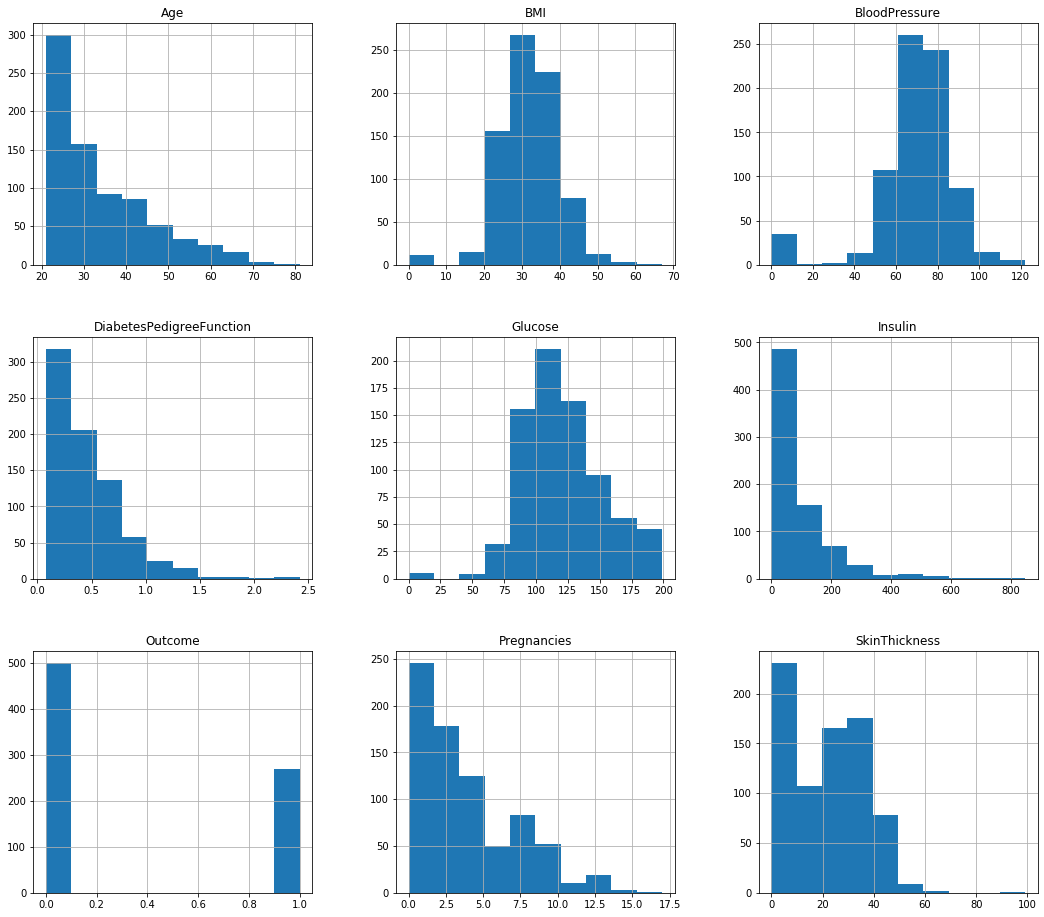

In [8]:
df.hist(figsize=(18,16))
plt.show()

**Plot heatmap to check correlation between each variable**

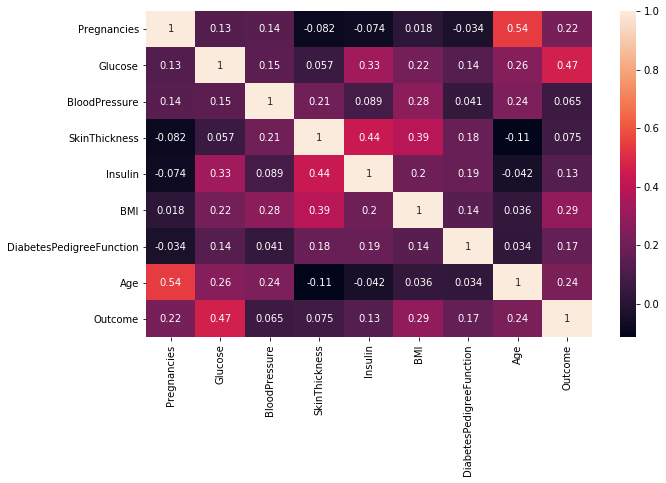

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
plt.show()

## 5. Data Preprocessing

**Define input variable X and target variable y**

In [10]:
X = df.iloc[:,:8]
y = df['Outcome']

**Normalize dataset using StandardScaler()**

In [11]:
X = StandardScaler().fit_transform(X)

**Split the dataset into train set and test set**

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=15)

## 6. Model Training and Evaluation

In this section, I will train the following classifiers:
- LogisticRegression
- SVC
- Decision Tree
- KNN

and evaluate these models using accuracy_score.


In [121]:
# create a dataframe to save model name and its accuracy
results = pd.DataFrame({'model': [], 'accuracy_score': []})

In [122]:
# create instances of each model
models = []
models.append(('logistic_regression', LogisticRegression(solver='lbfgs')))
models.append(('SVC', SVC(kernel='rbf', gamma='auto')))
models.append(('Decision_Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))

In [123]:
# train and evaluate each model using accuracy_score
for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = accuracy_score(y_test, preds)
    temp_results = pd.DataFrame({'model':[name],'accuracy_score': [score]})
    results = pd.concat([results, temp_results], axis=0)
    print("%s: %f" % (name, score))

logistic_regression: 0.753247
SVC: 0.757576
Decision_Tree: 0.705628
KNN: 0.735931


**Hyperparameter tunning using GridSearchCV.**

**SVC**

In [124]:
C = np.array([1,2,3,4,5,6,7])
kernel = ('linear','rbf')
param_grid = {'kernel': kernel, 'C':C}
svc = SVC(gamma='auto')
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, iid=True)
grid.fit(X_train,y_train)
print("Best Score: %f using %s" % (grid.best_score_, grid.best_params_))
means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']

for mean, param in zip(means, params):
    print("Score: %f using %s" % (mean, param))
    
# add the best score to results dataframe
results.loc[results['model'] == 'SVC', 'accuracy_score'] = grid.best_score_

Best Score: 0.765363 using {'C': 1, 'kernel': 'rbf'}
Score: 0.763501 using {'C': 1, 'kernel': 'linear'}
Score: 0.765363 using {'C': 1, 'kernel': 'rbf'}
Score: 0.763501 using {'C': 2, 'kernel': 'linear'}
Score: 0.744879 using {'C': 2, 'kernel': 'rbf'}
Score: 0.763501 using {'C': 3, 'kernel': 'linear'}
Score: 0.750466 using {'C': 3, 'kernel': 'rbf'}
Score: 0.763501 using {'C': 4, 'kernel': 'linear'}
Score: 0.750466 using {'C': 4, 'kernel': 'rbf'}
Score: 0.761639 using {'C': 5, 'kernel': 'linear'}
Score: 0.743017 using {'C': 5, 'kernel': 'rbf'}
Score: 0.761639 using {'C': 6, 'kernel': 'linear'}
Score: 0.743017 using {'C': 6, 'kernel': 'rbf'}
Score: 0.763501 using {'C': 7, 'kernel': 'linear'}
Score: 0.746741 using {'C': 7, 'kernel': 'rbf'}


**KNN**

In [125]:
k_values = np.array([1,3,5,7,9,11,13,15])
param_grid = dict(n_neighbors=k_values)
knn = KNeighborsClassifier()
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, iid=True)
grid.fit(X_train,y_train)
print("Best Score: %f using %s" % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']

for mean, param in zip(means, params):
    print("Score: %f using %s" % (mean, param))
    
# add the best score to results dataframe
results.loc[results['model'] == 'KNN', 'accuracy_score'] = grid.best_score_

Best Score: 0.748603 using {'n_neighbors': 13}
Score: 0.700186 using {'n_neighbors': 1}
Score: 0.729981 using {'n_neighbors': 3}
Score: 0.715084 using {'n_neighbors': 5}
Score: 0.729981 using {'n_neighbors': 7}
Score: 0.726257 using {'n_neighbors': 9}
Score: 0.746741 using {'n_neighbors': 11}
Score: 0.748603 using {'n_neighbors': 13}
Score: 0.741155 using {'n_neighbors': 15}


**Logistic Regression**

In [126]:
C = np.array([1,2,3,4,5,6,7,8,9,10])
param_grid = {'C': C}
lr = LogisticRegression(solver='lbfgs')
grid = GridSearchCV(estimator=lr,param_grid=param_grid,cv=5, iid=True)
grid.fit(X_train,y_train)
print("Best Score: %f using %s." % (grid.best_score_, grid.best_params_))

means = grid.cv_results_['mean_test_score']
params = grid.cv_results_['params']

for mean, param in zip(means, params):
    print("Score: %f using %s" % (mean, param))
    
# add the best score to results dataframe
results.loc[results['model'] == 'logistic_regression', 'accuracy_score'] = grid.best_score_

Best Score: 0.774674 using {'C': 3}.
Score: 0.772812 using {'C': 1}
Score: 0.772812 using {'C': 2}
Score: 0.774674 using {'C': 3}
Score: 0.774674 using {'C': 4}
Score: 0.774674 using {'C': 5}
Score: 0.774674 using {'C': 6}
Score: 0.774674 using {'C': 7}
Score: 0.774674 using {'C': 8}
Score: 0.774674 using {'C': 9}
Score: 0.774674 using {'C': 10}


**Improving accuracy using ensemble methods**

In [127]:
# create instances of ensemble methods
ensembles = []
ensembles.append(('RandomForest', RandomForestClassifier(n_estimators=100)))
ensembles.append(('GradientDescent', GradientBoostingClassifier(learning_rate=0.1, n_estimators=100)))
lr = LogisticRegression(C=3,solver='lbfgs')
ensembles.append(('AdaBoost', AdaBoostClassifier(base_estimator=lr,n_estimators=100, algorithm='SAMME.R')))

In [128]:
# train and evaluate ensemble methods
for name, model in ensembles:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = accuracy_score(y_test, preds)
    temp_results = pd.DataFrame({'model':[name], 'accuracy_score': [score]}) # create temporary dataframe
    results = pd.concat([results, temp_results], axis=0) # append the values to results dataframe
    print("%s: %f" % (name, score))

RandomForest: 0.753247
GradientDescent: 0.761905
AdaBoost: 0.753247


## 7. Final Results

In [129]:
results.reset_index(drop=True, inplace=True)
results

,model,accuracy_score
0,logistic_regression,0.774674
1,SVC,0.765363
2,Decision_Tree,0.705628
3,KNN,0.748603
4,RandomForest,0.753247
5,GradientDescent,0.761905
6,AdaBoost,0.753247


Although logistic_regression gives the best accuracy_score (0.7746) but after training the ensemble (AdaBoost) of logistic_regression we get accuracy_score 0.7532. this ensemble method (AdaBoost) will give us better results on the unseen data than logistic_regression.

But we have another ensemble method GradientDescent whose accuracy_score is higher than AdaBoost. So GradientDescent will be our final model.